In [1]:
pip install pytrends matplotlib seaborn plotly pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

In [3]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Py Trends Setup 

In [4]:
pytrends = TrendReq(hl='en-US' , tz=360)
keyword = "Cloud Computing"

# Data Request

In [5]:
pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='', gprop='')

# Finding Country-wise Interest

In [6]:
region_data = pytrends.interest_by_region()
region_data = region_data.reset_index()

region_data = region_data.sort_values(by=keyword, ascending = False).head(15)

# Bar Plot for Top Countries

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10800\4213368327.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




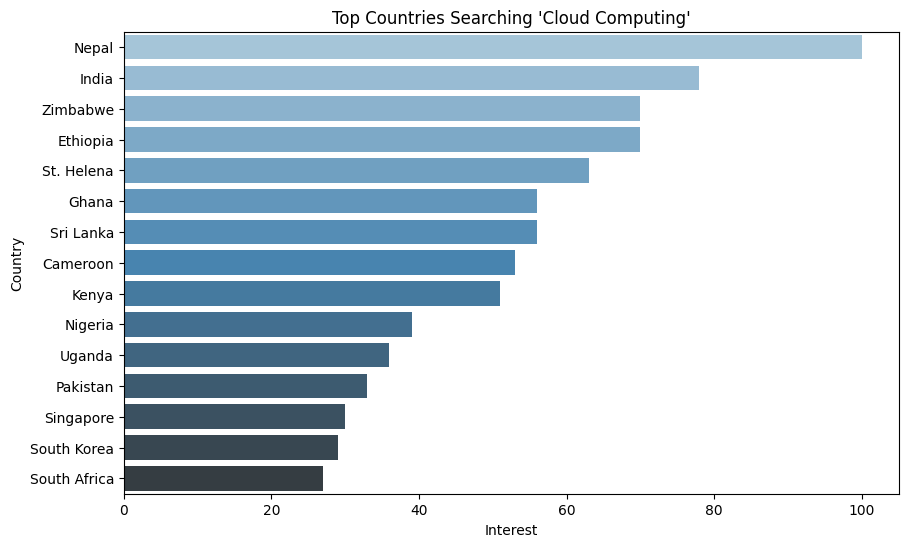

In [7]:
plt.figure(figsize = (10,6))
sns.barplot(x=region_data[keyword], y=region_data["geoName"], palette = 'Blues_d')
plt.title(f"Top Countries Searching '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# Creating World Map Plot

In [8]:
fig = px.choropleth(region_data, 
                    locations='geoName',
                    locationmode='country names',
                    color=keyword,
                    title=f"Search Interest for '{keyword}' by Country",
                    color_continuous_scale='Blues')
fig.show()
                    

# Finding Time-wise Interest

In [9]:
time_df = pytrends.interest_over_time()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



# Line Plot (Search Trend Over Time)

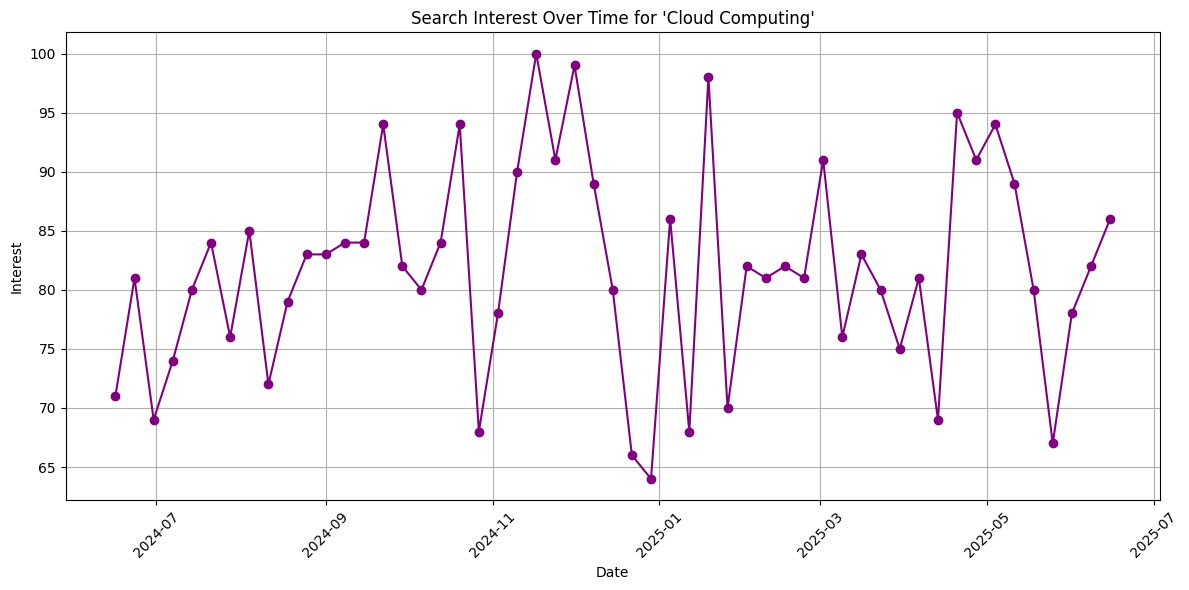

In [10]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker='o', color='purple')
plt.title(f"Search Interest Over Time for '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparing Multiple Keywords

In [11]:
kw_list = ["cloud computing", "data science", "machine learning"]
pytrends.build_payload(kw_list, cat=0, timeframe = 'today 12-m',geo ='',gprop='')

# Comparision Plot (line Plot of All 3 Keywords)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



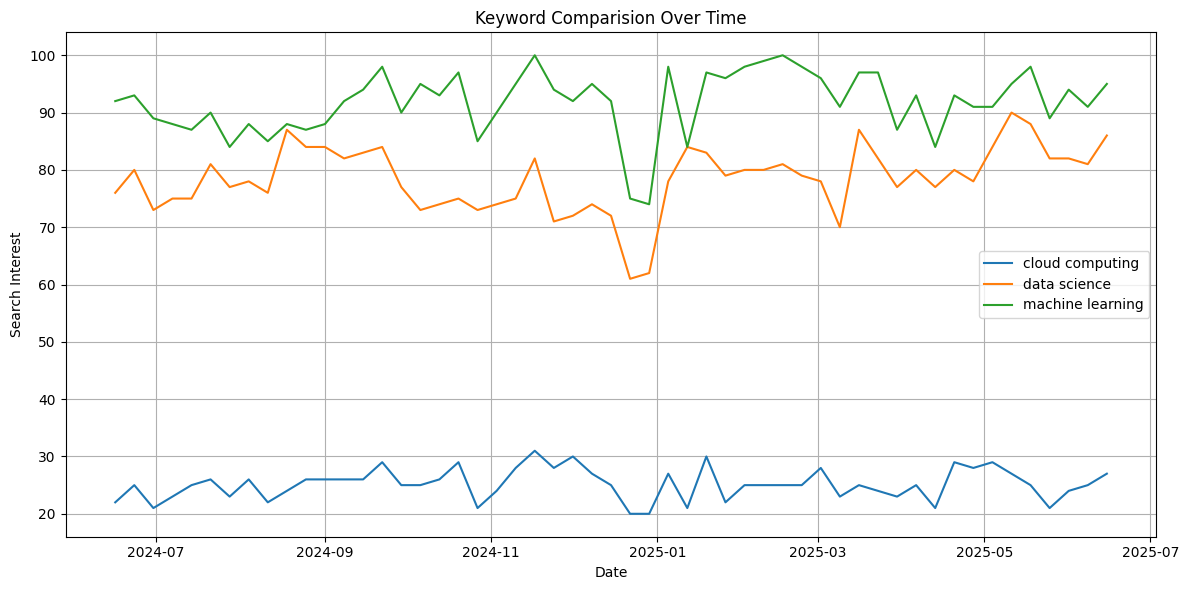

In [12]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label= kw)

plt.title("Keyword Comparision Over Time")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()